<a href="https://colab.research.google.com/github/AketzalliG/docs/blob/master/L05_Red_Neuronal_Densa_TF_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RED NEURONAL DENSA**
## Housing

**PASO 1.-** Importar las librerias

In [42]:
# Paquetería básica
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#TensorFlow y Keras
import tensorflow as tf
from tensorflow import keras

# Funcionalidades básicas de Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

**PASO 2.-** Descargar el archivo y caargar los datos

In [43]:
!wget 'https://github.com/Dr-Carlos-Villasenor/Clase_Aprendizaje_Profundo/raw/main/Datasets/Housing.csv'

--2025-10-04 08:45:10--  https://github.com/Dr-Carlos-Villasenor/Clase_Aprendizaje_Profundo/raw/main/Datasets/Housing.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dr-Carlos-Villasenor/Clase_Aprendizaje_Profundo/main/Datasets/Housing.csv [following]
--2025-10-04 08:45:10--  https://raw.githubusercontent.com/Dr-Carlos-Villasenor/Clase_Aprendizaje_Profundo/main/Datasets/Housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29981 (29K) [text/plain]
Saving to: ‘Housing.csv.3’

Housing.csv.3       100%[===================>]  29.28K  --.-KB/s    in 0.003s  

2025-10-04 08:45:11 (9.64 MB/s)

In [44]:
dataset = pd.read_csv('Housing.csv')
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


**PASO 3.-** Limpieza de daatos y codificación

In [45]:
# Inspección inicial del dataset
dataset.info()

# Manejo de valores faltantes
dataset.isnull().sum()

# Codificación de variables binarias (Si/No)
binary_cols = ['mainroad', 'guestroom', 'basement',
               'hotwaterheating','airconditioning','prefarea']
for col in binary_cols:
  dataset[col] = dataset[col].replace({'yes': 1, 'no': 0})

# Codificación de la variable categórica 'furnishingstatus'
dataset = pd.get_dummies(dataset, columns=['furnishingstatus'], drop_first=False)

dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column                           Non-Null Co

/tmp/ipython-input-2227680253.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[col] = dataset[col].replace({'yes': 1, 'no': 0})


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


**PASO 4.-** Elegir las variables de entrada y salida

In [46]:
# La variable de salida (y) es la variable de interés 'price'
y = dataset[['price']]

# Las variables de entrada (X) son todas las demás variables
x = dataset.drop(columns=['price'])

print(x.shape)
print(y.shape)

y_log = np.log1p(y)

(545, 14)
(545, 1)


**PASO 5.-** Normalizar y particionar el conjunto de datos

In [49]:
# Normalización de los datos de entrada (X)
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

# Particionar el conjunto de datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y_log, test_size=0.2, random_state=42)

**PASO 6.-** Diseñar una red neuronal

In [50]:
# Importar las librerías necesarias
from keras import backend as KerasTensor

def build_model():
  model = keras.Sequential()

  # Capa de entrada y primera capa oculta
  model.add(keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
  model.add(keras.layers.Dropout(0.2))

  # Segunda capa oculta
  model.add(keras.layers.Dense(64, activation='tanh'))

  # Capa de salida para regresion
  model.add(keras.layers.Dense(1, activation='linear'))

  model.compile(loss='mse',
                optimizer=keras.optimizers.Adam(),
                metrics=['mae'])

  return model

model = build_model()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,241 (40.00 KB)

 Trainable params: 10,241 (40.00 KB)

 Non-trainable params: 0 (0.00 B)

**PASO 7.-** Entrenar la red neuronal y dibujar las graficas de evolucion de entrenamiento

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 216.4956 - mae: 14.6909 - val_loss: 156.3451 - val_mae: 12.4923
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 140.1954 - mae: 11.8044 - val_loss: 92.5162 - val_mae: 9.5951
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 81.7733 - mae: 8.9891 - val_loss: 49.6166 - val_mae: 7.0090
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 43.4794 - mae: 6.5358 - val_loss: 25.4811 - val_mae: 5.0034
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.1946 - mae: 4.6502 - val_loss: 12.9734 - val_mae: 3.5482
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.5417 - mae: 3.3284 - val_loss: 6.6273 - val_mae: 2.5084
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.7175 - mae: 2.3161 - val_loss: 3.3994 - val_mae: 1.7592
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.8033 - mae: 1.5849 - val_loss: 1.7569 - val_mae: 1.2144
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 

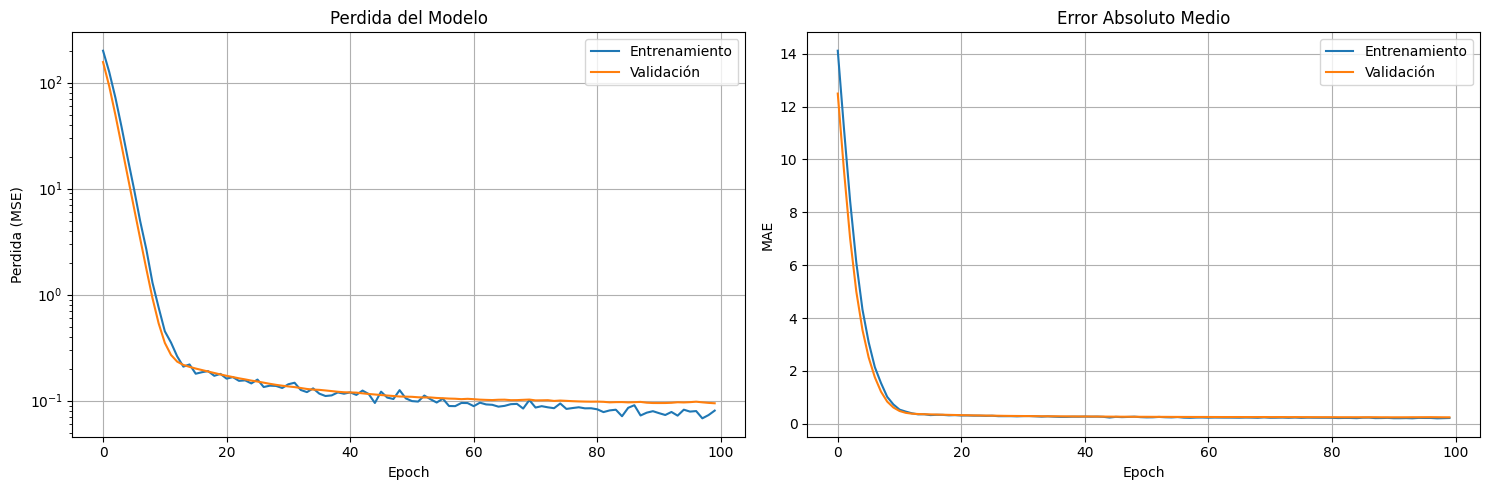

In [51]:
# Entrenar el modelo
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Dibujar las curvas de aprendizaje
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(15,5))

  # Gráfico de la pérdida (Loss)
  plt.subplot(121)
  plt.title('Perdida del Modelo')
  plt.xlabel('Epoch')
  plt.ylabel('Perdida (MSE)')
  plt.plot(hist['epoch'], hist['loss'], label='Entrenamiento')
  plt.plot(hist['epoch'], hist['val_loss'], label='Validación')
  plt.yscale('log')
  plt.legend()
  plt.grid(True)

  # Metrica MAE (Error Absoluto Medio)
  plt.subplot(122)
  plt.title('Error Absoluto Medio')
  plt.xlabel('Epoch')
  plt.ylabel('MAE')
  plt.plot(hist['epoch'], hist['mae'], label='Entrenamiento')
  plt.plot(hist['epoch'], hist['val_mae'], label='Validación')
  plt.legend()
  plt.grid(True)

  plt.tight_layout()
  plt.show()

plot_history(history)


**PASO 8.-** Implementacion de Early Stopping como regulador

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 370: early stopping
Restoring model weights from the end of the best epoch: 350.


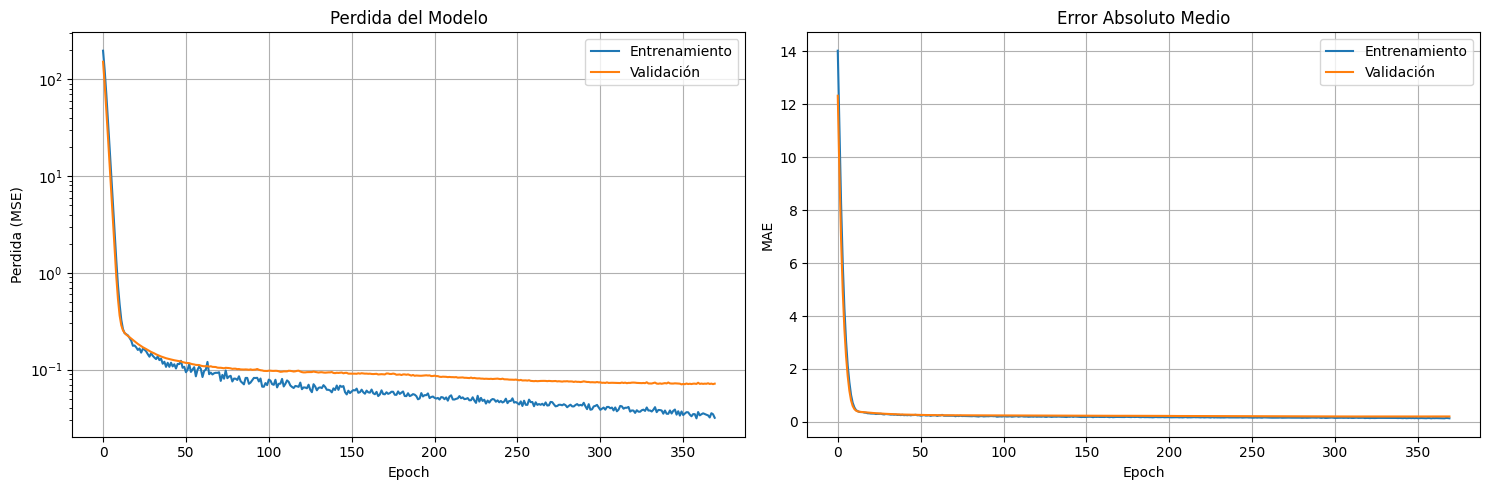

In [52]:
# Crear la instancia de EarlyStopping
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=20,
                                   verbose=1,
                                   restore_best_weights=True)

# Construir el modelo optimizado
model_optimized = build_model()

# Entrenar el modelo optimizado
history_optimized = model_optimized.fit(x_train,
                                         y_train,
                                         batch_size=32,
                                         epochs=1000,
                                         validation_data=(x_test, y_test),
                                         verbose=0,
                                         callbacks=[es])

# Dibujar las curvas de aprendizaje
plot_history(history_optimized)

**PASO 9.-** Cálcuo de Métricas

In [53]:
# Importar las librerías necesarias
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Realizar predicciones en el conjunto de prueba (x_test)
y_pred = model_optimized.predict(x_test)
y_true = np.asanyarray(y_test)

# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas
print("\n--- Métricas de Desempeño del Modelo de Regresión ---")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinación (R² Score): {r2:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

--- Métricas de Desempeño del Modelo de Regresión ---
Error Cuadrático Medio (MSE): 0.07
Raíz del Error Cuadrático Medio (RMSE): 0.27
Error Absoluto Medio (MAE): 0.21
Coeficiente de Determinación (R² Score): 0.6355
